In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc,accuracy_score,classification_report,confusion_matrix

from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.utils import np_utils
#from keras.callbacks import TensorBoard

In [37]:
data=np.load('faces.npz')
x_train=data['trainX']
y_train=data['trainY']
x_test=data['testX']
y_test=data['testY']
x_train=np.array(x_train,dtype='float32')/255
#x_train/=255
x_test=np.array(x_test,dtype='float32')/255
#x_test/=255
print(x_train.shape)
print(x_train)

(240, 10304)
[[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]


In [38]:
x_train,x_validate,y_train,y_validate=train_test_split(x_train,y_train,test_size=0.05,random_state=2)

In [39]:
x_train=x_train.reshape(x_train.shape[0],112,92,1)
x_test=x_test.reshape(x_test.shape[0],112,92,1)
x_validate=x_validate.reshape(x_validate.shape[0],112,92,1)
y_train=np_utils.to_categorical(y_train,20)
y_test=np_utils.to_categorical(y_test,20)
y_validate=np_utils.to_categorical(y_validate,20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(228, 112, 92, 1)
(160, 112, 92, 1)
(228, 20)


In [40]:
model=Sequential()
model.add(Convolution2D(36,(7,7),activation='relu',input_shape=(112,92,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(54,(5,5),activation='relu',input_shape=(112,92,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 53, 43, 36)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 24624)             0         
                                                                 
 dense_16 (Dense)            (None, 1024)             

In [42]:
history=model.fit(x_train,y_train,epochs=50,batch_size=512,validation_data=(x_validate,y_validate))

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 2.9918 - accuracy: 0.0789 - val_loss: 3.2133 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 4s 4s/step - loss: 3.6591 - accuracy: 0.0614 - val_loss: 2.9818 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 4s 4s/step - loss: 3.0962 - accuracy: 0.0439 - val_loss: 2.9709 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 5s 5s/step - loss: 2.9930 - accuracy: 0.0395 - val_loss: 2.9920 - val_accuracy: 0.0833
Epoch 5/50
1/1 [==============================] - 4s 4s/step - loss: 2.9895 - accuracy: 0.0833 - val_loss: 2.9997 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 4s 4s/step - loss: 2.9897 - accuracy: 0.0789 - val_loss: 3.0004 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 4s 4s/step - loss: 2.9825 - accuracy: 0.0746 - val_loss: 3.0053 - val_accuracy: 0.0000e+00
Epoch 8/50
1/1 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


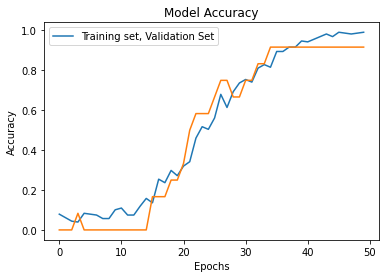

In [44]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training set, Validation Set'], loc='upper left')
plt.show()